In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

In [6]:
FILE = '../Сводная вегетация.xlsx'
YEARS = [2012, 2013, 2014, 2015, 2016]

In [7]:
def get_year_culture_week_ndvi():
    data = pd.DataFrame(columns = ['year', 'culture', 'week', 'ndvi'])
    
    for year in YEARS:
        df = pd.read_excel(FILE, sheetname=str(year), header=1)

        ndvi_columns = [col for col in df.columns if 'неделя' in col]
        culture_column = 'Культура ' + str(year)
        interesting_columns = [culture_column], ndvi_columns
        
        df = df[[culture_column] + ndvi_columns]
        data_array = []
        
        for i in range(df.shape[0]):
            for j in range(1, df.shape[1]):
                culture = df.iloc[i][culture_column]
                week = int(df.columns[j].replace('неделя ', ''))
                ndvi = df.iloc[i, j]
                
                row = [year, culture, week, ndvi]
                data_array.append(row)
                
        data_array = np.array(data_array)
        data_frame = pd.DataFrame(data_array, columns=data.columns)
        data = pd.concat([data, data_frame[data_frame['ndvi'] != 'nan']])
        
    return data

In [8]:
df = get_year_culture_week_ndvi()

In [9]:
df.dtypes

year       object
culture    object
week       object
ndvi       object
dtype: object

In [10]:
df['year'] = df['year'].astype(int)
df['week'] = df['week'].astype(int)
df['ndvi'] = df['ndvi'].astype(float)

df.dtypes

year         int64
culture     object
week         int64
ndvi       float64
dtype: object

In [11]:
le = LabelEncoder()
df['culture'] = le.fit_transform(df['culture'])
df.head()

,year,culture,week,ndvi
5,2012,4,48,0.382
6,2012,4,47,0.380
8,2012,4,45,0.353
10,2012,4,43,0.341
11,2012,4,42,0.354


In [12]:
df_train = df[df['year'] != 2015]
df_test = df[df['year'] == 2015]

In [13]:
X_train = df_train[['culture', 'week']]
X_test = df_test[['culture', 'week']]

y_train = df_train['ndvi']
y_test = df_test['ndvi']

print('X_train.shape:\t', X_train.shape)
print('X_test.shape:\t', X_test.shape)
print('y_train.shape:\t', y_train.shape)
print('y_test.shape:\t', y_test.shape)

X_train.shape:	 (17022, 2)
X_test.shape:	 (7204, 2)
y_train.shape:	 (17022,)
y_test.shape:	 (7204,)


In [14]:
X_train.head()

,culture,week
5,4,48
6,4,47
8,4,45
10,4,43
11,4,42


In [15]:
def r2_of(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_pred, y_test)

In [16]:
r2_of(DummyRegressor())

-9.4180281680068325e+30

In [17]:
r2_of(SVR())

0.22627116090340804

In [18]:
r2_of(MLPRegressor())

0.22528420683181682

In [19]:
df['culture'].unique()

array([ 4,  0, 10,  2,  5,  3,  7, 11,  6,  8,  1,  9])

In [20]:
def plot_ndvi(culture, model):
    model.fit(X_train, y_train)

    cult_df = X_test[X_test['culture'] == culture].groupby('week').mean().reset_index()
    weeks = cult_df['week'].unique()
    weeks.sort()

    ndvi = model.predict(cult_df)
    plt.plot(weeks, ndvi)

In [21]:
def plot_all_ndvi(model):
    for cult in X_test['culture'].unique():
        plot_ndvi(cult, model)

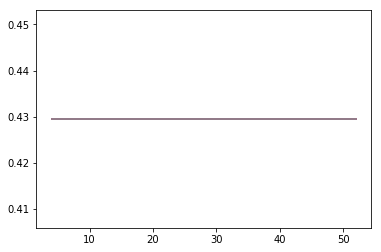

In [22]:
plot_all_ndvi(DummyRegressor())

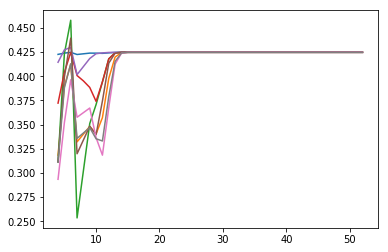

In [23]:
plot_all_ndvi(SVR())

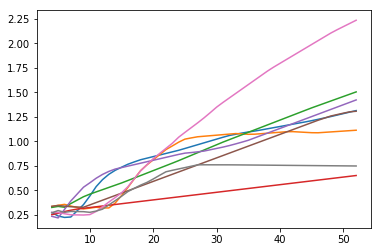

In [24]:
plot_all_ndvi(MLPRegressor())